In linear SVM, the result a hyperplane that seperates the classes as best as possible. The
weight represent this hyperplane, by giving the coordinates a vector which is
orthogonol to the hyperplane- these are the coefficient given by svc.coef_.

It's give the direction of the predicted class, so if you take the dot product of any point with the 
vector , you can tell which side it is, if the dot product is positive ,it belongs to the positive
class , if it negative it belongs to the negative class.





In [1]:
import numpy as np
import pandas as pd

In [86]:
np.random.seed(1234)

In [87]:
# creating simulated dataset
x1 = np.random.uniform(0, 100, 100)
x2 = np.random.uniform(0,100,100)
def bound(x):
    X= 50+(x-2*(x-20)+3*(x-50)**3/8000)
    return X
y = np.where(x2 > bound(x1),0,1)



In [88]:
# creating the Data Frame
df1 = pd.DataFrame(x1,columns=['x1'])
df2 = pd.DataFrame(x2,columns=['x2'])
df3 = pd.DataFrame(y,columns =['y'])
df = pd.concat([df1, df2,df3], axis=1)
print(df.head())

          x1         x2  y
0  19.151945  76.711663  0
1  62.210877  70.811536  0
2  43.772774  79.686718  0
3  78.535858  55.776083  0
4  77.997581  96.583653  0


In [89]:
y=df.iloc[:,2]
X =df.iloc[:,0:2]
print(X.head())

          x1         x2
0  19.151945  76.711663
1  62.210877  70.811536
2  43.772774  79.686718
3  78.535858  55.776083
4  77.997581  96.583653


In [90]:
from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(X,y)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [91]:
print(svc.coef_)

[[ 0.0078898  -0.03168226]]


In [92]:
print(svc.intercept_)

[ 1.67338123]


In [93]:
y_pred =svc.predict(X)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0])

In [94]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline

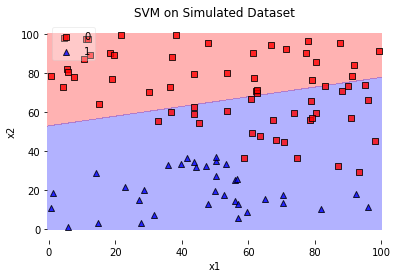

In [95]:
plot_decision_regions(X.values, y.values, clf=svc,
                      res=0.02, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM on Simulated Dataset')
plt.show()

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y, y_pred))
confusion_matrix(y,y_pred)


0.72


array([[37, 28],
       [ 0, 35]])

## Tunning the SVM Linear Kernel

In [97]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':['linear'], 'C':[0.001,0.01, 0.1, 1, 5, 10, 100]}



In [98]:
svc= svm.SVC()
clf = GridSearchCV(estimator=svc, param_grid= parameters)
clf.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [99]:
print(clf.best_params_)

{'C': 0.001, 'kernel': 'linear'}


In [100]:
y_pred =clf.predict(X)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0])

In [101]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y, y_pred))
confusion_matrix(y,y_pred)

0.99


array([[64,  1],
       [ 0, 35]])

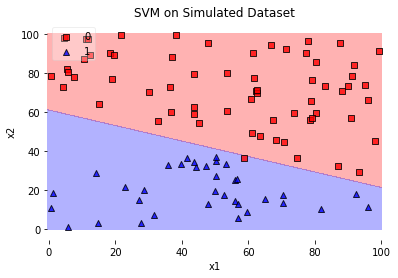

In [102]:
plot_decision_regions(X.values, y.values, clf=clf,
                      res=0.02, legend=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM on Simulated Dataset')
plt.show()